In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LSHForest

In [2]:
from keras.datasets import boston_housing


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(seed=True,test_split=0.6)


In [4]:
lshf=LSHForest(random_state=42,n_estimators=1)

C:\anaconda\lib\site-packages\sklearn\neighbors\approximate.py:220: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


In [5]:
lshf.fit(x_train)

C:\anaconda\lib\site-packages\sklearn\random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


LSHForest(min_hash_match=4, n_candidates=50, n_estimators=1, n_neighbors=5,
     radius=1.0, radius_cutoff_ratio=0.9, random_state=42)

In [6]:
x_train.shape

(202, 13)

In [7]:
y_train.shape

(202,)

In [8]:
lshf.get_params()

{'min_hash_match': 4,
 'n_candidates': 50,
 'n_estimators': 1,
 'n_neighbors': 5,
 'radius': 1.0,
 'radius_cutoff_ratio': 0.9,
 'random_state': 42}

In [9]:
a = lshf.trees_

In [10]:
len(a[0])

202

In [11]:
bin(a[0][10])

'0b1000000010110111011001000101010'

In [12]:
[bin(x) for x in a[0]]

['0b1000000010110111010001100101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001000101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011001100101010',
 '0b1000000010110111011101000101010',
 '0b1000000010110111011101000101010',
 '0b1000000010110111011101000101010',
 '0b1000000010110111011101000101010',
 '0b1000000010110111011101000101010',
 '0b1000000010110111011101000101010',
 '0b1000000010110111011101000101110',
 '0b1000000010110111011101000101110',
 '0b10000000

In [13]:
bb = [(bin(x)[2:]) for x in a[0]]


In [14]:
bb

['1000000010110111010001100101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001000101010',
 '1000000010110111011001100101010',
 '1000000010110111011001100101010',
 '1000000010110111011001100101010',
 '1000000010110111011001100101010',
 '1000000010110111011001100101010',
 '1000000010110111011001100101010',
 '1000000010110111011001100101010',
 '1000000010110111011101000101010',
 '1000000010110111011101000101010',
 '1000000010110111011101000101010',
 '1000000010110111011101000101010',
 '1000000010110111011101000101010',
 '1000000010110111011101000101010',
 '1000000010110111011101000101110',
 '1000000010110111011101000101110',
 '1000000010110111011101000101110',
 '10000000101101110111010001

In [16]:
input_arr=np.zeros((202,32))
for s in range(len(bb)):
    num=[int(bb[s][i:i+1]) for i in range(0, len(bb[s]), 1)]
    num=np.array(num)
    len32=0
    if len(num)<32:
        j=-1
        for ii in range(32-len(num),len(num)):
            j=j+1
            input_arr[s][ii]=num[j]

print (len(input_arr[0]))


32


In [17]:
input_arr[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  0.])

In [18]:
noise_factor = 0.5
input_arr_noisy = input_arr + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=input_arr.shape) 
input_arr_noisy = np.clip(input_arr_noisy, 0., 1.)


In [19]:
type(y_train)

numpy.ndarray

In [20]:
label=y_train
label

array([ 28.2,  23.9,  16.6,  22. ,  20.8,  23. ,  27.9,  14.5,  21.5,
        22.6,  23.7,  31.2,  19.3,  19.4,  19.4,  27.9,  13.9,  50. ,
        24.1,  14.6,  16.2,  15.6,  23.8,  25. ,  23.5,   8.3,  13.5,
        17.5,  43.1,  11.5,  24.1,  18.5,  50. ,  12.6,  19.8,  24.5,
        14.9,  36.2,  11.9,  19.1,  22.6,  20.7,  30.1,  13.3,  14.6,
         8.4,  50. ,  12.7,  25. ,  18.6,  29.8,  22.2,  28.7,  23.8,
         8.1,  22.2,   6.3,  22.1,  17.5,  48.3,  16.7,  26.6,   8.5,
        14.5,  23.7,  37.2,  41.7,  16.5,  21.7,  22.7,  23. ,  10.5,
        21.9,  21. ,  20.4,  21.8,  50. ,  22. ,  23.3,  37.3,  18. ,
        19.2,  34.9,  13.4,  22.9,  22.5,  13. ,  24.6,  18.3,  18.1,
        23.9,  50. ,  13.6,  22.9,  10.9,  18.9,  22.4,  22.9,  44.8,
        21.7,  10.2,  15.4,  25.3,  23.3,   7.2,  21.2,  11.7,  27. ,
        29.6,  26.5,  43.5,  23.6,  11. ,  33.4,  36. ,  36.4,  19. ,
        20.2,  34.9,  50. ,  19.3,  14.9,  26.6,  19.9,  24.8,  21.2,
        23.9,  20.6,

In [21]:
from keras.layers import Input, Dense
from keras.models import Model


In [22]:
# this is our input placeholder
input_img = Input(shape=(32,))

In [23]:
#stacked layers of autoencoder
encoded = Dense(16, activation='relu')(input_img)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='sigmoid')(decoded)

In [24]:
autoencoder = Model(input_img, decoded)


In [25]:
#Let's also create a separate encoder model:
encoder = Model(input_img, encoded)


#create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(32,))


In [26]:
#create the decoder model
decoder = Model(input_img,decoded)


In [27]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
Total para

In [28]:
parameter=autoencoder.fit(input_arr_noisy,input_arr_noisy,
                          shuffle=True,epochs=100,
                          batch_size=10,
                          validation_data=(input_arr_noisy,input_arr_noisy))
print(parameter)

Train on 202 samples, validate on 202 samples
Epoch 1/100
202/202 [==============================] - 0s - loss: 0.6919 - acc: 0.3445 - val_loss: 0.6900 - val_acc: 0.3899
Epoch 2/100
202/202 [==============================] - 0s - loss: 0.6880 - acc: 0.3936 - val_loss: 0.6852 - val_acc: 0.4067
Epoch 3/100
202/202 [==============================] - 0s - loss: 0.6812 - acc: 0.3974 - val_loss: 0.6735 - val_acc: 0.3895
Epoch 4/100
202/202 [==============================] - 0s - loss: 0.6522 - acc: 0.4189 - val_loss: 0.6031 - val_acc: 0.4629
Epoch 5/100
202/202 [==============================] - 0s - loss: 0.5590 - acc: 0.4725 - val_loss: 0.5333 - val_acc: 0.47850.474
Epoch 6/100
202/202 [==============================] - 0s - loss: 0.5293 - acc: 0.4785 - val_loss: 0.5260 - val_acc: 0.4785
Epoch 7/100
202/202 [==============================] - 0s - loss: 0.5256 - acc: 0.4785 - val_loss: 0.5246 - val_acc: 0.4785
Epoch 8/100
202/202 [==============================] - 0s - loss: 0.5246 - acc: 0

In [29]:
encoded_imgs = encoder.predict(input_arr_noisy)
print(encoded_imgs.shape)
decoded_imgs = decoder.predict(input_arr_noisy)
print(decoded_imgs.shape)

(202, 2)
(202, 32)


In [30]:
import matplotlib.pyplot as plt


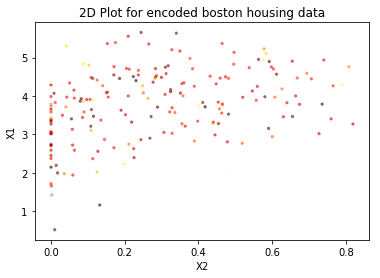

In [33]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=label,s=5,alpha=0.5,cmap=plt.cm.hot)
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("2D Plot for encoded boston housing data")
plt.savefig("2D_plot_boston_housing_data1.png")
plt.show()
plt.close()

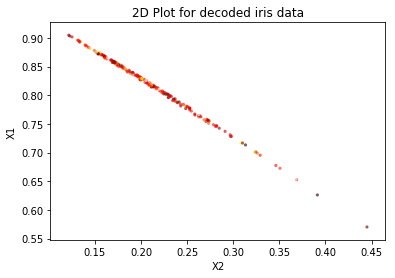

In [34]:
plt.scatter(decoded_imgs[:,0],decoded_imgs[:,1],c=label,s=5,alpha=0.5,cmap=plt.cm.hot)
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("2D Plot for decoded iris data")
plt.savefig("2D_plot_iris_data2.png")
plt.show()
plt.close()

In [35]:
print(decoded_imgs[0])


[ 0.26267132  0.76179141  0.26701474  0.29559281  0.2221245   0.24921101
  0.64546221  0.25469878  0.26742995  0.78619081  0.23366387  0.75949758
  0.76426548  0.25875977  0.75701225  0.75538069  0.7568152   0.25467521
  0.74374419  0.69619149  0.48030502  0.33900279  0.7128557   0.55553776
  0.23837031  0.24809834  0.75503308  0.27214196  0.74770051  0.41400862
  0.75428003  0.22677645]


In [36]:
#implementing RBM 
import tensorflow as tf


In [37]:
#creating RBM layers
visible_bias=tf.placeholder("float",[32]) 
hidden_bias=tf.placeholder("float",[2])


In [38]:
#define weights among the input and and hidden layer nodes. W=weight matrix ,a tensor of 32x500
W=tf.placeholder("float",[32,2])

In [39]:
#forward pass
v0=tf.placeholder("float",[None,32])
_h0=tf.nn.sigmoid(tf.matmul(v0,W)+hidden_bias) #probabilities of the hidden units
h0=tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0)))) #sample activation given the input

In [40]:
#backward pass i.e reconstruction
_v1=tf.nn.sigmoid(tf.matmul(h0,tf.transpose(W))+visible_bias)
v1=tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1)))) #sample input given the activation
h1=tf.nn.sigmoid(tf.matmul(v1,W)+hidden_bias)

In [41]:
#Positive gradient only depends on input
#Negative gradient only depends on model
#Contrastive Divergence is actually matrix of values that is computed and used to adjusty values of W,W is update to new value W'
#as W'=W+alpha*CD
#alpha=learning rate

alpha=0.5
w_positive_grad=tf.matmul(tf.transpose(v0),h0)
w_negative_grad=tf.matmul(tf.transpose(v1),h1)
CD=(w_positive_grad-w_negative_grad)/tf.to_float(tf.shape(v0)[0])
W_updated=W + alpha*CD
visible_bias_updated=visible_bias + tf.reduce_mean(v0-v1,0)
hidden_bias_updated=hidden_bias + tf.reduce_mean(h0-h1,0)


In [42]:
#calculate error : to show difference between the data and its reconstruction

error=tf.reduce_mean(tf.square(v0-v1))

In [43]:
#start the session and initialize the variables
cur_w=np.zeros([32,2],np.float32)
cur_visible_bias=np.zeros([32],np.float32)
cur_hidden_bias=np.zeros([2],np.float32)
prv_w=np.zeros([32,2],np.float32)
prv_visible_bias=np.zeros([32],np.float32)
prv_hidden_bias=np.zeros([2],np.float32)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)


In [44]:
sess.run(error,feed_dict={v0:input_arr, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })

0.49458539

Epoch : 0 reconstruction error : 0.094678
Epoch : 1 reconstruction error : 0.097153
Epoch : 2 reconstruction error : 0.095916
Epoch : 3 reconstruction error : 0.097153
Epoch : 4 reconstruction error : 0.091275
Epoch : 5 reconstruction error : 0.100712
Epoch : 6 reconstruction error : 0.098236
Epoch : 7 reconstruction error : 0.100712
Epoch : 8 reconstruction error : 0.095761
Epoch : 9 reconstruction error : 0.100248
Epoch : 10 reconstruction error : 0.094678
Epoch : 11 reconstruction error : 0.099629
Epoch : 12 reconstruction error : 0.100248
Epoch : 13 reconstruction error : 0.094988
Epoch : 14 reconstruction error : 0.101176
Epoch : 15 reconstruction error : 0.100093
Epoch : 16 reconstruction error : 0.098546
Epoch : 17 reconstruction error : 0.098236
Epoch : 18 reconstruction error : 0.100248
Epoch : 19 reconstruction error : 0.100866
Epoch : 20 reconstruction error : 0.101330
Epoch : 21 reconstruction error : 0.094524
Epoch : 22 reconstruction error : 0.099783
Epoch : 23 reconstruc

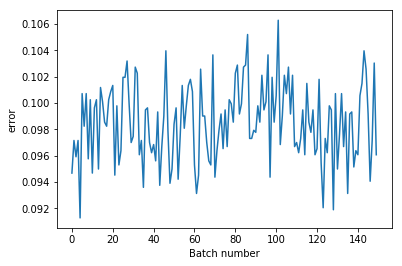

In [49]:
#Parameters for training
epochs= 150
batchsize=10
weights=[]
errors=[]

for epochs in range(epochs):
    for start,end in list(zip(range(0,len(input_arr),batchsize), range(batchsize, len(input_arr),batchsize))):
        batch=input_arr[start:end]
        cur_w = sess.run(W_updated, feed_dict={v0:batch, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })
        cur_visible_bias = sess.run(visible_bias_updated, feed_dict={v0:batch, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })
        cur_hidden_bias =  sess.run(hidden_bias_updated, feed_dict={v0:batch, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias })
        prv_w = cur_w
        prv_visible_bias = cur_visible_bias
        prv_hidden_bias = cur_hidden_bias
        if start%10000==0:
            errors.append(sess.run(error,feed_dict={v0:input_arr, W:prv_w, visible_bias:prv_visible_bias, hidden_bias: prv_hidden_bias }))
            weights.append(cur_w)
    
    print('Epoch : %d' % epochs,'reconstruction error : %f' %errors[-1])
    
plt.plot(errors)
plt.xlabel("Batch number")
plt.ylabel("error")
plt.show()
    


In [50]:
uw=weights[-1].T
uw #a weight matrix of shape 32x2


array([[ -2.54654431,   2.16717434,  -2.62905478,   3.88186646,
         -3.02218795,  -2.859658  ,   1.38720632,  -2.79794478,
         -2.94278836,   2.9817729 ,  -2.8825469 ,   2.58865714,
          2.73646402,  -1.65821886,   2.88832712,   2.54004025,
          5.99053907,  -2.81578231,  -1.4400804 ,  -7.66241884,
          3.49904108,   5.64151525,  -1.21935666,  12.02747822,
         -2.58830452,  -2.78259349,   4.45605135,  -2.48162866,
          2.76741409,  -5.83234978,   2.86140847,  -2.38916755],
       [ -2.58177662,   2.30578494,  -2.6805706 ,   3.89101505,
         -3.04855752,  -2.88768315,   1.35044932,  -2.81904149,
         -2.97504115,   3.12245774,  -2.89566374,   2.73941898,
          2.88808894,  -1.67126501,   3.04119015,   2.68384957,
          6.17588091,  -2.83753943,  -1.29735518,  -7.57201862,
          3.52761865,   5.70241833,  -1.07455301,  12.12283421,
         -2.60033202,  -2.80141044,   4.63258791,  -2.50503349,
          2.91173482,  -5.78342772,   3

In [51]:
weights=np.asarray(weights)
print(weights.shape)
temp=np.dot(input_arr,weights[-1])
print(temp.shape)

(150, 32, 2)
(202, 2)


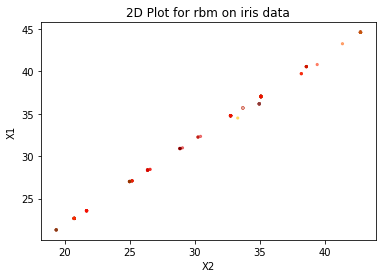

In [52]:
plt.scatter(temp[:,0],temp[:,1],c=label,s=5,alpha=0.5,cmap=plt.cm.hot)
plt.ylabel("X1")
plt.xlabel("X2")
plt.title("2D Plot for rbm on iris data")
plt.savefig("2D_plot_rbm_iris_data.png")
plt.show()
plt.close()